# Coding Assignment 3: Tucker Simpson and Seamus O'Connell

I discussed these problems with Jorie MacDonald

## Problem 1
Call a number $n$ cube-summable if it can be expressed as a sum of distinct positive perfect cubes. So, the number 9 is cube-summable since $9 = 1^3 + 2^3$, but the number 2 is not. In this coding assignment you have to find out how many cube-summable numbers are there between 1 and a million?

This is a special case of the subset sum problem. It differs in what is in $A$ and what $B$ is. Furthermore, $A = [1^3, 2^3, 3^3, ... ]$. There are precisely $\lfloor n^{1/3} \rfloor$ numbers in $A$, with $a_n = \lfloor n^{1/3} \rfloor ^3$. Rather than a specific target sum $B$, we are interested in finding how many different integers between 1 and a million we can create by summing subsets of perfect cubes from $A$. In subset sum, we actually already do this for all numbers between 1 and $B$. Therefore, our recurrence doesn't change although we tweak the recovery to change what answer we are returning. In the specific case of finding the cube-summable numbers between 1 and a million, we have $A= [1^3, 2^3, ..., 100^3]$ and are interested in all $b$ between 1 and 1,000,000.

In [61]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [65]:
'''
Input: a non-negative integer n
Output: number of cube-summable numbers between 1 and n
'''
def cube_summable_nums(n):
    # Calculate n^(1/3). We know that anything higher than x will be greater than n if we cube it, so we
    # only consider numbers from 1 to x as potential summands
    x = math.floor(np.cbrt(n))
    
    # initialize A
    A = [0] * (x)
    for i in range(x):
        A[i] = (i+1)**3
        
    # F[i] = 1 if i is a cube summable number, F[i] = 0 otherwise
    F = np.zeros((x, n+1))
    
    # Base case: Empty set sums to zero
    for i in range(0, x):
        F[i, 0] = 1
    
    for m in range(0,x):
        for targ in range(1,n+1):
            
            # targ is less than A[m], so because we only consider positive summands, A[m] could not be one of them
            if targ - A[m] < 0:
                F[m, targ] = F[m-1, targ]
                
            # If we  found summands in A[0:m-1] that sum to targ or sum to targ-A[m] we can find summands in A[0:m]
            # that sum to targ
            else:
                F[m, targ] = max(F[m-1, targ], F[m-1, targ-A[m]])
    
    # Solution recovery -- with the entire set of potential summands at our disposal, how many numbers did we reach
    sum = 0
    for i in range(1, n+1):
        if F[x-1, i] == 1:
            sum += 1
    
    return sum

In [71]:
cube_summable_nums(1000000)

997212

In [72]:
cube_summable_nums(500000)

497212

In [176]:
'''
Input: non-negative integer n
Output: graph of the runnning time of cube_summable_nums(n) for i<=1,000,000 in jumps of 10,000
'''
def graph_cube_summable(n):
    X = list()
    Y = list()
    # Calculate the run-time in increments of 100
    for i in range(1, n // 10000):
        print("On " + str(i) + " out of " + str(n//10000))
        X.append(i * 10000)
        Y.append(cube_summable_nums(i * 10000))
    
    plt.plot(X, Y)
    plt.title('Cube-Summable Numbers')
    plt.legend(loc='upper left')
    plt.legend(loc='upper left')
    plt.xlabel("n")
    plt.ylabel("Num of CSNs between 1 and n")

    plt.show()

On 1 out of 100
On 2 out of 100
On 3 out of 100
On 4 out of 100
On 5 out of 100
On 6 out of 100
On 7 out of 100
On 8 out of 100
On 9 out of 100
On 10 out of 100
On 11 out of 100
On 12 out of 100
On 13 out of 100
On 14 out of 100
On 15 out of 100
On 16 out of 100
On 17 out of 100
On 18 out of 100
On 19 out of 100
On 20 out of 100
On 21 out of 100
On 22 out of 100
On 23 out of 100
On 24 out of 100
On 25 out of 100
On 26 out of 100
On 27 out of 100
On 28 out of 100
On 29 out of 100
On 30 out of 100
On 31 out of 100
On 32 out of 100
On 33 out of 100
On 34 out of 100
On 35 out of 100
On 36 out of 100
On 37 out of 100
On 38 out of 100
On 39 out of 100
On 40 out of 100
On 41 out of 100
On 42 out of 100
On 43 out of 100
On 44 out of 100
On 45 out of 100
On 46 out of 100
On 47 out of 100
On 48 out of 100
On 49 out of 100
On 50 out of 100
On 51 out of 100
On 52 out of 100
On 53 out of 100
On 54 out of 100
On 55 out of 100
On 56 out of 100
On 57 out of 100
On 58 out of 100
On 59 out of 100
On 60 

No handles with labels found to put in legend.
No handles with labels found to put in legend.


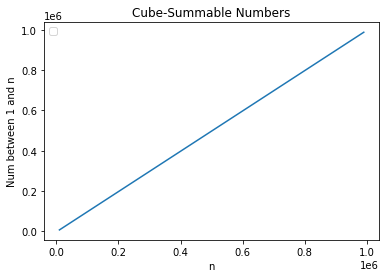

In [177]:
graph_cube_summable(1000000)

Graphing the cube-summable numbers reveals that the relationship between the number of cube-summable numbers of $n$ and $n$ is roughly linear. Moreover, the relationship is roughly $y = x.$

## Problem 2
As in Coding Assignment 1, for a positve integer $n$, define $A_n$ to be the array of single-digit non-negative
integers containing the first $n$ digits of π. So $A_1 = [3]$, $A_2 = [3, 1]$, and so on. You have to write code which
takes input $n$ and finds the length of the longest increasing subsequence in $A_n$.

In [74]:
import time

In [75]:
# Citation: taken from helper.py
def read_pi(n):
    # opens the file name "pi" and reads the first n digits
    # puts it in the list pi, and returns that list
    pi = list()
    f = open('../../Downloads/pi', 'r')
    for i in range(n):
        d = f.read(1)
        pi.append(int(d))
    return pi

Implement the $O(n^2)$ time algorithm for LIS. Use this to return the length of an LIS of $A_{10000}$, that
is, the length of an LIS among the first 10,000 digits of π? Does this code return the length of an LIS
of $A_{1000000}$? If so, how long did it take?

In [85]:
'''
Input: a positive integer n
Ouptut: the length of the LIS in the first n digits of pi
'''
def slow_LIS(n):
    start_time = time.time()
    
    # fill A with the first n digits of pi
    A = read_pi(n)
    
    # L[i] will contain the longest increasing subsequence ending at A[i] for all 0 <= i <= n-1
    L = np.zeros(n, int)
    
    # Equal to the length of the largest LIS that we have seen at any point in the algorithm
    longest = 0
    
    for m in range(0, n):
        
        # L[m] is at least 1
        L[m] = 1
        
        # Find the longest LIS in A[0:m-1] which we can append A[m] to
        for j in range(m):
            if A[j] <= A[m]:
                L[m] = max(L[m], L[j] + 1)
                
        longest = max(longest, L[m])
    
    print("Actual run time: " + str(time.time() - start_time) + " seconds.")
    
    return longest

In [86]:
slow_LIS(10000)

Actual run time: 24.032535076141357 seconds.


1136

Running this on $A_{1000000}$ takes a very long time, and we did not have time to run it to completion.

In [84]:
slow_LIS(1000000)

KeyboardInterrupt: 

Implement the $O(n $ log $ n)$ time algorithm for LIS. Use this to return the length of an LIS of $A_{1000000}$,
that is, the length of an LIS among the first million digits of π? How long did this take? (10 points)

In [87]:
'''
Input: D is a non-decreasing list such that D[i] is equal to the smallest A[j] such that A[j] is the last element
        in an LIS of length i+1
       e is an element A[m]. We are working toward finding the LIS in A[0:m] that ends at A[m]
Output: The largest l such that D[l] <= m
'''
def bin_search(D, e):
    l = 0
    u = len(D)
    
    # Invariant: l <= s* <= u
    while u-l > 1:
        # s = ceiling((l+u)/2)
        # credit: https://stackoverflow.com/questions/14822184/is-there-a-ceiling-equivalent-of-operator-in-python
        s = -((l+u) // -2)  # upside-down floor division
        
        # Check the right-half for a further-right element <= m
        if(D[s] <= e):
            l = s
        
        # Check the left half for an element <= m
        else:
            u = s
    
    return l

In [88]:
'''
Input: a positive integer n
Ouptut: the length of the LIS in the first n digits of pi
'''
def fast_LIS(n):
    start_time = time.time()
    
    # fill A with the first n digits of pi
    A = read_pi(n)
    
    # L[i] will contain the longest increasing subsequence ending at A[i] for all 0 <= i <= n-1
    L = np.zeros(n, dtype = int)
    
    # t-1 is equal to the length of the longest LIS which we have seen
    t = 0
    
    # D[j] is equal to the smallest element A[i] such that L[i] = j
    D = []
    
    for m in range(0, n):
        # Find the length of the longest LIS which we can append A[m] to
        s = bin_search(D, A[m])
        
        L[m] = int(s + 1)
        
        # Account for D being 0-indexed: D[i] corresponds to LIS of length i+1
        # Bank the new longest LIS that we have discovered
        if L[m] > t - 1:
            t += 1
            D.append(A[m])
            
        # m is now index such that L[m] = s and A[m] is the smallest element ending an LIS of length s
        elif A[m] < D[L[m]]:
            D[L[m]] = A[m]
    
    print("Actual run time: " + str(time.time()-start_time) + " seconds.")
    
    return t-1

In [89]:
fast_LIS(10000)

Actual run time: 0.04268503189086914 seconds.


1136

In [83]:
fast_LIS(1000000)

Actual run time: 4.671924829483032 seconds.


101892